## End member mixing analysis (EMMA) to determine streamflow source contributions

### Principle components analysis using conservative tracers using the python scikit-learn library.​

#### Here started with solute data from Hungerford Brook late winter/early spring flow events captured with ISCOs. Data include:
- ICP-OES (Al, Ca, Cu, Fe, K, Mg, Mn, Na,P,Zn,Si
- IC and total elemental analyser data (Cl, SO4, NO3, PO4, TOC, DIN)
- Stable isotopes (dD, d18O)

Data are from the BREE OneDrive directory (Watershed Data>1_Projects>EMMA>Working file for MATLAB 2023)

- For HB 2022 timeseries, 17 parameters total
- 5 were found to be relatively conservative: Cl, Ca, Na, Si, and Mg
- See "bivariates" notebook for those plots

This code below first selects the relevant parameters (conservative solutes), standardizes the data (as Inamdar emphasizes), and then applies PCA. The plot shows the cumulative explained variance as the number of principal components increases. We can then choose the number of principal components based on the explained variance we wish to retain.

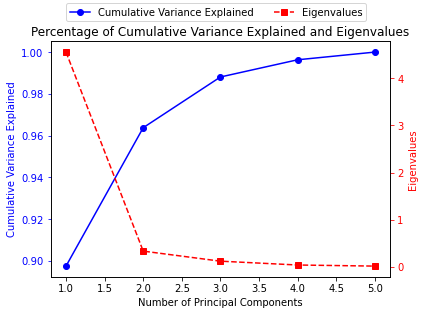

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data from the CSV file
data = pd.read_csv("/home/millieginty/Documents/git-repos/EMMA/data/Data_for_EMMA_2022_HB.csv")

# Select the specific parameters of interest
selected_parameters = ['Ca_mg_L', 'Cl_mg_L', 'Si_mg_L', 'Na_mg_L', 'Mg_mg_L']

# Extract the subset of data for selected parameters
subset_data = data[selected_parameters]

# Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

# Apply PCA
pca = PCA()  # Don't specify the number of components for now
pca_result = pca.fit_transform(scaled_data)

# Plot the percentage of cumulative variance explained on the primary y-axis
fig, ax1 = plt.subplots()

ax1.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), 
         marker='o', color='blue', label='Cumulative Variance Explained')
ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Cumulative Variance Explained', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for eigenvalues
ax2 = ax1.twinx()
ax2.plot(range(1, len(pca.explained_variance_) + 1), 
         pca.explained_variance_, 
         marker='s', color='red', linestyle='--', label='Eigenvalues')
ax2.set_ylabel('Eigenvalues', color='red')
ax2.tick_params('y', colors='red')

# Display the legend
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

plt.title('Percentage of Cumulative Variance Explained and Eigenvalues')
plt.show()

### Once we have a specific number of components in mind, we can modify the n_components parameter when creating the PCA object:

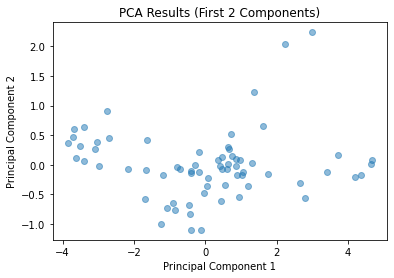

In [31]:
# Load the data from the CSV file
data = pd.read_csv("/home/millieginty/Documents/git-repos/EMMA/data/Data_for_EMMA_2022_HB.csv")

# Select the specific parameters of interest
selected_parameters = ['Ca_mg_L', 'Cl_mg_L', 'Si_mg_L', 'Na_mg_L', 'Mg_mg_L']

# Extract the subset of data for selected parameters
subset_data = data[selected_parameters]

# Standardize the data (mean=0 and variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components
pca_result = pca.fit_transform(scaled_data)

# Plot the PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Results (First 2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()